In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from Matrix_methods.Simulate import simulate_reference, simulate_parallel
from Matrix_methods.AdamExtractor import gen_loss_function 

In [2]:
# Define simulation parameters
deltat = 0.0194e-12  # Time step
L = 2**12  # Number of time points

# Generate reference pulse
reference_pulse = simulate_reference(L, deltat)

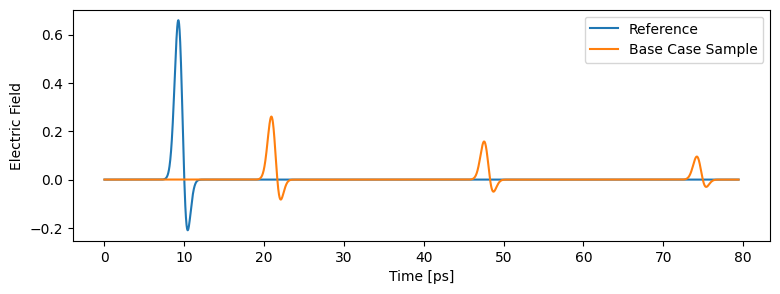

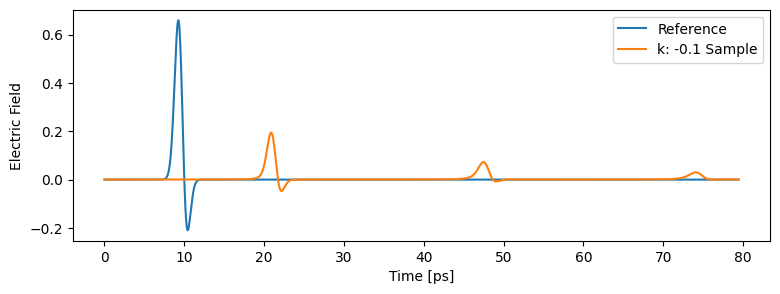

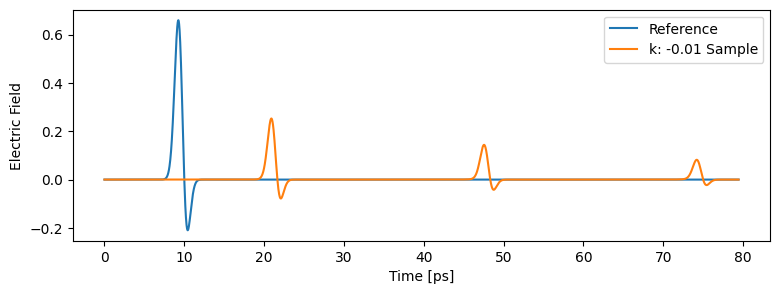

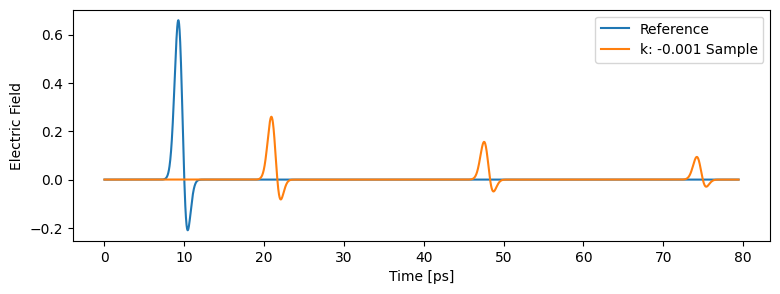

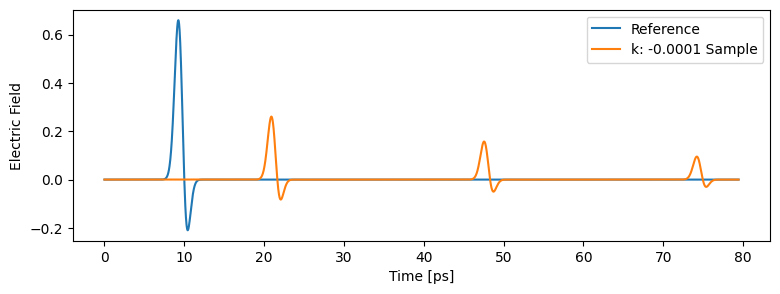

k: -0.1   | loss: 0.013060502707958221
k: -0.01   | loss: 0.002125905593857169
k: -0.001   | loss: 0.00022737996187061071
k: -0.0001   | loss: 2.2898906536283903e-05


In [12]:
n = 7.99
d = 500e-6
k_0 = 0 # Treat as base case
k_vals = [-10**(-i) for i in range(1, 5)]


t_axis = np.arange(0, L * deltat, deltat)

_, base_sample_pulse = simulate_parallel(reference_pulse, layers=[[(n+1j*k_0), d]], deltat=deltat, noise_level=0)
base_sample_pulse = base_sample_pulse[:L]

plt.figure(figsize=(9,3))
plt.plot(t_axis*1e12, reference_pulse, label='Reference')
plt.plot(t_axis*1e12, base_sample_pulse.detach().cpu().numpy(), label='Base Case Sample')
plt.xlabel('Time [ps]')
plt.ylabel('Electric Field')
plt.xticks()
plt.yticks()
plt.legend()
plt.show()

loss_vals = []

for k in k_vals:
    loss = 0
    _, new_pulse = simulate_parallel(reference_pulse, layers=[[(n+1j*k), d]], deltat=deltat, noise_level=0)
    new_pulse = new_pulse[:L]

    loss = gen_loss_function(new_pulse, base_sample_pulse)
    loss_vals.append(loss)

    plt.figure(figsize=(9,3))
    plt.plot(t_axis*1e12, reference_pulse, label='Reference')
    plt.plot(t_axis*1e12, new_pulse.detach().cpu().numpy(), label=f'k: {k} Sample')
    plt.xlabel('Time [ps]')
    plt.ylabel('Electric Field')
    plt.xticks()
    plt.yticks()
    plt.legend()
    plt.show()

for k, loss in zip(k_vals, loss_vals):
    print(f'k: {k}   | loss: {loss}')


